In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.preprocessing import MinMaxScaler

In [137]:
data = pd.read_csv('data/titanic.csv')

# Data preprocessing

In [138]:
data.head(n=10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [139]:
data.shape

(887, 8)

check for missing values

In [140]:
print(data.isna().sum())
print()
print(data.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


remove the `name` column since it is useless to us

In [141]:
data = data.drop('Name', axis=1)

encode the `sex` column

In [142]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [143]:
data['Sex'].replace(['male', 'female'], ['0', '1'], inplace=True)

In [144]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


check class imbalance

<AxesSubplot: xlabel='Survived', ylabel='Count'>

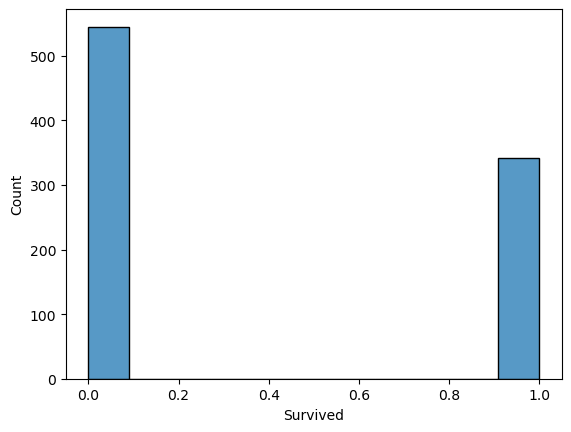

In [145]:
sns.histplot(data, x=data['Survived'])

In [146]:
print(f"Survived %: {(data[data['Survived'] == 1].shape[0] / data.shape[0]) * 100}")
print(f"Deceased %: {(data[data['Survived'] == 0].shape[0] / data.shape[0]) * 100}")

Survived %: 38.55693348365276
Deceased %: 61.44306651634723


## Data normalization

In [147]:
import plotly.figure_factory as ff
import plotly.express as px

In [148]:
from copy import deepcopy

In [149]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Age

In [150]:
fig = px.histogram(data, x="Age")
fig.show()

In [151]:
data = data[data['Age'] < 74]

In [152]:
fig = px.histogram(data, x="Age")
fig.show()

#### Mean/Std

In [153]:
data_age_mean = data['Age'].mean(axis=0)
data_age_std = data['Age'].std(axis=0)

In [154]:
data['Age'] = (data['Age']-data_age_mean)/data_age_std

In [155]:
fig = px.histogram(data, x="Age")
fig.show()

### Fare

In [156]:
fig = px.histogram(data, x="Fare", color="Pclass")
fig.show()

In [157]:
data = data[data['Fare'] < 500]

In [158]:
fig = px.histogram(data, x="Fare", color="Pclass")
fig.show()

#### Log scalling

In [159]:
data['Fare'] = data['Fare'].apply(lambda x: np.log(x+1))

In [160]:
fig = px.histogram(data, x="Fare")
fig.show()

In [161]:
# data_fare_mean = data['Fare'].mean(axis=0)
# data_fare_std = data['Fare'].std(axis=0)
# data['Fare'] = (data['Fare']-data_fare_mean)/data_fare_std

In [162]:
# data.describe()

In [163]:
# fig = px.histogram(data, x="Fare")
# fig.show()

## Split dataset

In [164]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.383220,2.310658,-0.001455,0.528345,0.384354,2.954296
std,0.486447,0.834065,1.001387,1.107088,0.809075,0.953365
min,0.000000,1.000000,-2.074126,0.000000,0.000000,0.000000
25%,0.000000,2.000000,-0.671025,0.000000,0.000000,2.188856
50%,0.000000,3.000000,-0.097746,0.000000,0.000000,2.737881
75%,1.000000,3.000000,0.618852,1.000000,0.000000,3.465736
max,1.000000,3.000000,2.983628,8.000000,6.000000,5.575949


In [165]:
from sklearn.model_selection import train_test_split

70% 15% 15%

In [166]:
y = data['Survived']
x = data[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

In [167]:
print(y.shape)
print(x.shape)

(882,)
(882, 5)


In [168]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=420)

In [169]:
# print(len(x_train), len(y_train))
# print(len(x_temp), len(y_temp))

In [170]:
# x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, train_size=0.5, random_state=420)

In [171]:
# print(len(x_val), len(y_val))
# print(len(x_test), len(y_test))

In [172]:
x_train.to_csv('data/train/data.csv', index=False)
y_train.to_csv('data/train/labels.csv', index=False)

x_val.to_csv('data/val/data.csv', index=False)
y_val.to_csv('data/val/labels.csv', index=False)

# x_test.to_csv('data/test/data.csv', index=False)
# y_test.to_csv('data/test/labels.csv', index=False)

<AxesSubplot: xlabel='Survived', ylabel='Count'>

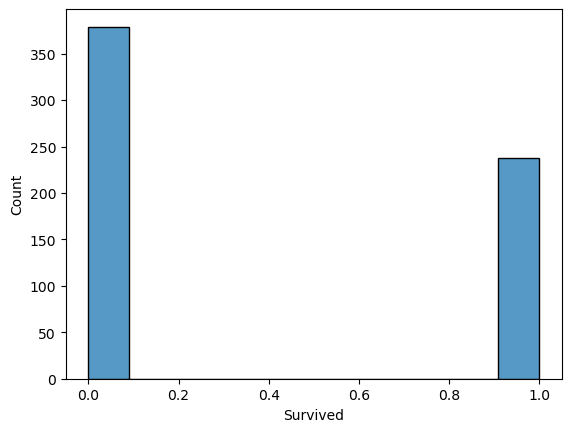

In [173]:
sns.histplot(data, x=y_train)

<AxesSubplot: xlabel='Survived', ylabel='Count'>

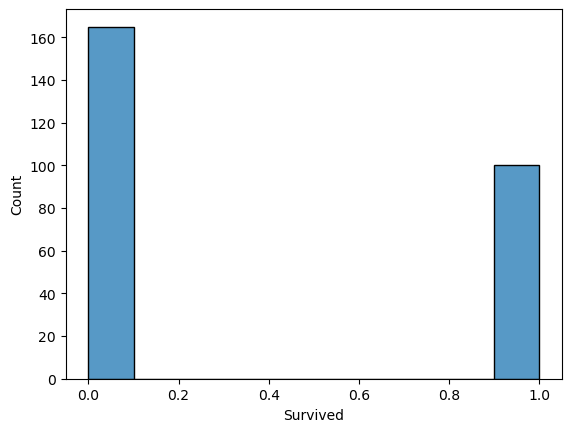

In [174]:
sns.histplot(data, x=y_val)

In [175]:
sns.histplot(data, x=y_test)

NameError: name 'y_test' is not defined

# Playground

In [ ]:
print(data['Parents/Children Aboard'].sort_values().unique())
print(data['Siblings/Spouses Aboard'].sort_values().unique())

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 8]


In [ ]:
data[data['Siblings/Spouses Aboard'] == 8]

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
158,0,3,0,-1.745923,8,2,1.365716
179,0,3,1,-1.530944,8,2,1.365716
200,0,3,0,-0.886005,8,2,1.365716
322,0,3,0,-0.671025,8,2,1.365716
788,0,3,1,-0.599366,8,2,1.365716
842,0,3,0,-0.814345,8,2,1.365716
859,0,3,1,-1.100985,8,2,1.365716


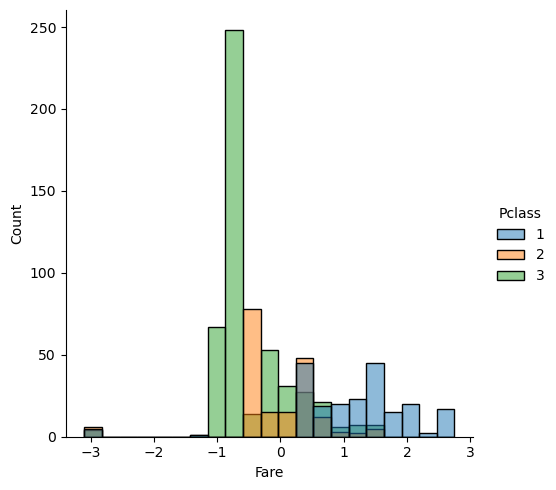

In [ ]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Skalovanie hodnot stlpca 'Fare' do rozsahu (0, 1)

In [ ]:
data['Fare'].describe()

count    8.820000e+02
mean    -3.031085e-16
std      1.000000e+00
min     -3.098807e+00
25%     -8.028814e-01
50%     -2.270009e-01
75%      5.364578e-01
max      2.749894e+00
Name: Fare, dtype: float64

<AxesSubplot: xlabel='Fare', ylabel='Density'>

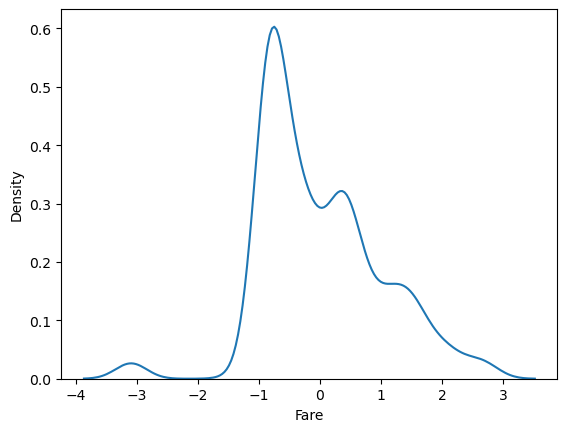

In [ ]:
sns.kdeplot(data['Fare'])

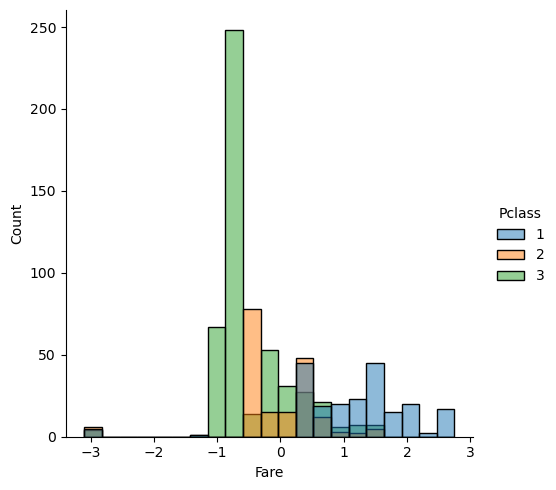

In [ ]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [ ]:
data['Fare'].sort_values().tail(10)

697    2.598532
554    2.598532
297    2.686516
117    2.686516
738    2.747408
309    2.747408
339    2.749894
87     2.749894
27     2.749894
435    2.749894
Name: Fare, dtype: float64

In [ ]:
data = data[data['Fare'] < 500]

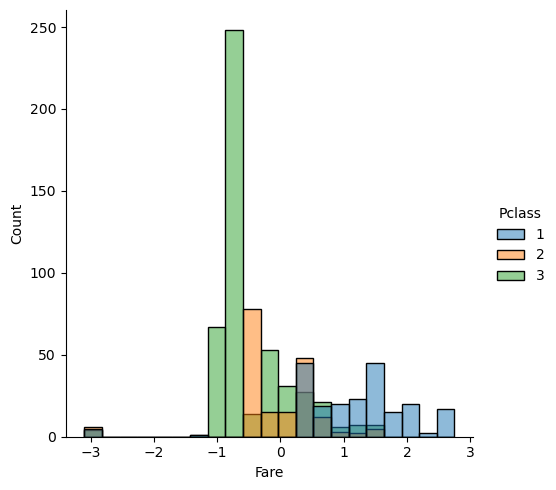

In [ ]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [ ]:
scaler = MinMaxScaler()
data['Fare'] = scaler.fit_transform(data['Fare'].values.reshape(-1,1))

NameError: name 'MinMaxScaler' is not defined

In [ ]:
data['Fare'].describe()

count    8.820000e+02
mean    -3.031085e-16
std      1.000000e+00
min     -3.098807e+00
25%     -8.028814e-01
50%     -2.270009e-01
75%      5.364578e-01
max      2.749894e+00
Name: Fare, dtype: float64

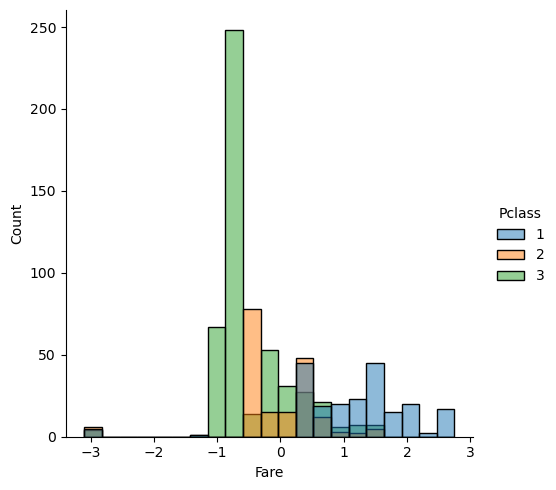

In [ ]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Normalizacia stlpca 'Fare' pomocou mean a variance 

In [ ]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: -3.031085083103602e-16
variance: 0.9999999999999946


In [ ]:
data['Fare'] = data['Fare'] - fare_mean
data['Fare'] = data['Fare'] / fare_variance

In [ ]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: 2.5033213633036223e-18
variance: 0.0004035102899262997


<Axes: xlabel='Fare', ylabel='Density'>

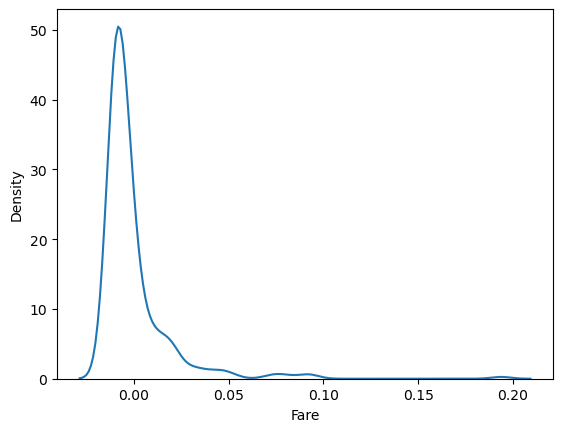

In [ ]:
sns.kdeplot(data['Fare'])

## Zobrazenie dat po ukonceni predspracovania

In [ ]:
data.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,0.027567
1,1,1,1,38.0,1,0,0.271039
2,1,3,1,26.0,0,0,0.030133
3,1,1,1,35.0,1,0,0.201901
4,0,3,0,35.0,0,0,0.030608
5,0,3,0,27.0,0,0,0.032161
6,0,1,0,54.0,0,0,0.197196
7,0,3,0,2.0,3,1,0.080133
8,1,3,1,27.0,0,2,0.042332
9,1,2,1,14.0,1,0,0.114338
